# Term Deposit Subscription by a client

## Problem Statement:
The objective of the dataset is to predict whether or not a client will subscribe to the term deposit.  

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age, job, marital status, and so on.

## Data Definition:

Input variables:

1) **age** (numeric)


2) **job:**  type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')


3) **marital:** &nbsp;&nbsp; marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) **education:** (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')


5) **default:** has credit in default? (categorical: 'no','yes','unknown')


6) **housing:** has housing loan? (categorical: 'no','yes','unknown')


7) **loan:**    has personal loan? (categorical: 'no','yes','unknown')


8) **contact:** contact communication type (categorical: 'cellular','telephone') 


9) **month:**   last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


10) **day_of_week:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11) **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


12) **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)


13) **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14) **previous:** number of contacts performed before this campaign and for this client (numeric)


15) **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


16) **emp.var.rate:** employment variation rate - quarterly indicator (numeric)


17) **cons.price.idx:** consumer price index - monthly indicator (numeric) 


18) **cons.conf.idx:** consumer confidence index - monthly indicator (numeric) 


19) **euribor3m:** euribor 3 month rate - daily indicator (numeric)


20) **nr.employed:** number of employees - quarterly indicator (numeric)



Output variable (desired target):

21) **y** - has the client subscribed a term deposit? (binary: 'yes','no')


## Exploratory Data Analysis and Data preparation

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score
import graphviz
from IPython.display import Image
from warnings import filterwarnings
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

In [2]:
filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("Project 8 - SVM/Dataset/bank-additional-full.csv",delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


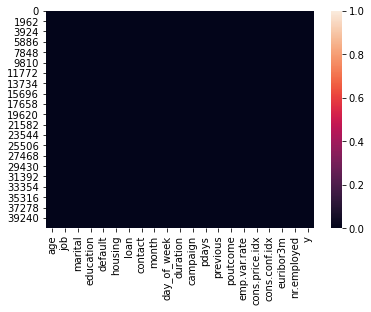

In [7]:
sns.heatmap(df.isnull(), vmin = 0.0, vmax = 1.0)
plt.show()

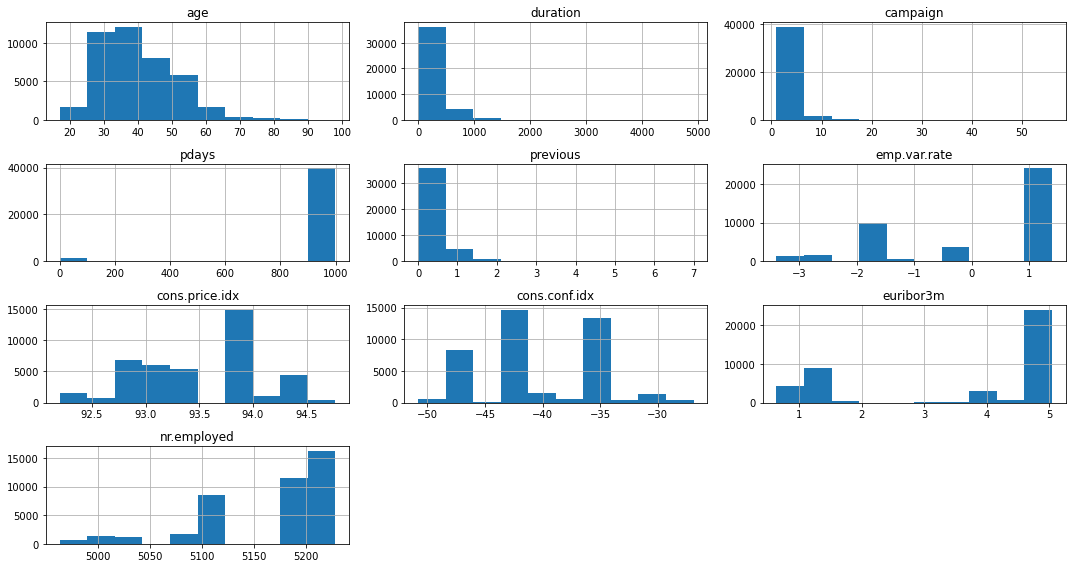

In [8]:
plt.rcParams['figure.figsize'] = [15,8]
df.hist()
plt.tight_layout()
plt.show()

In [9]:
df.select_dtypes(include = "object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


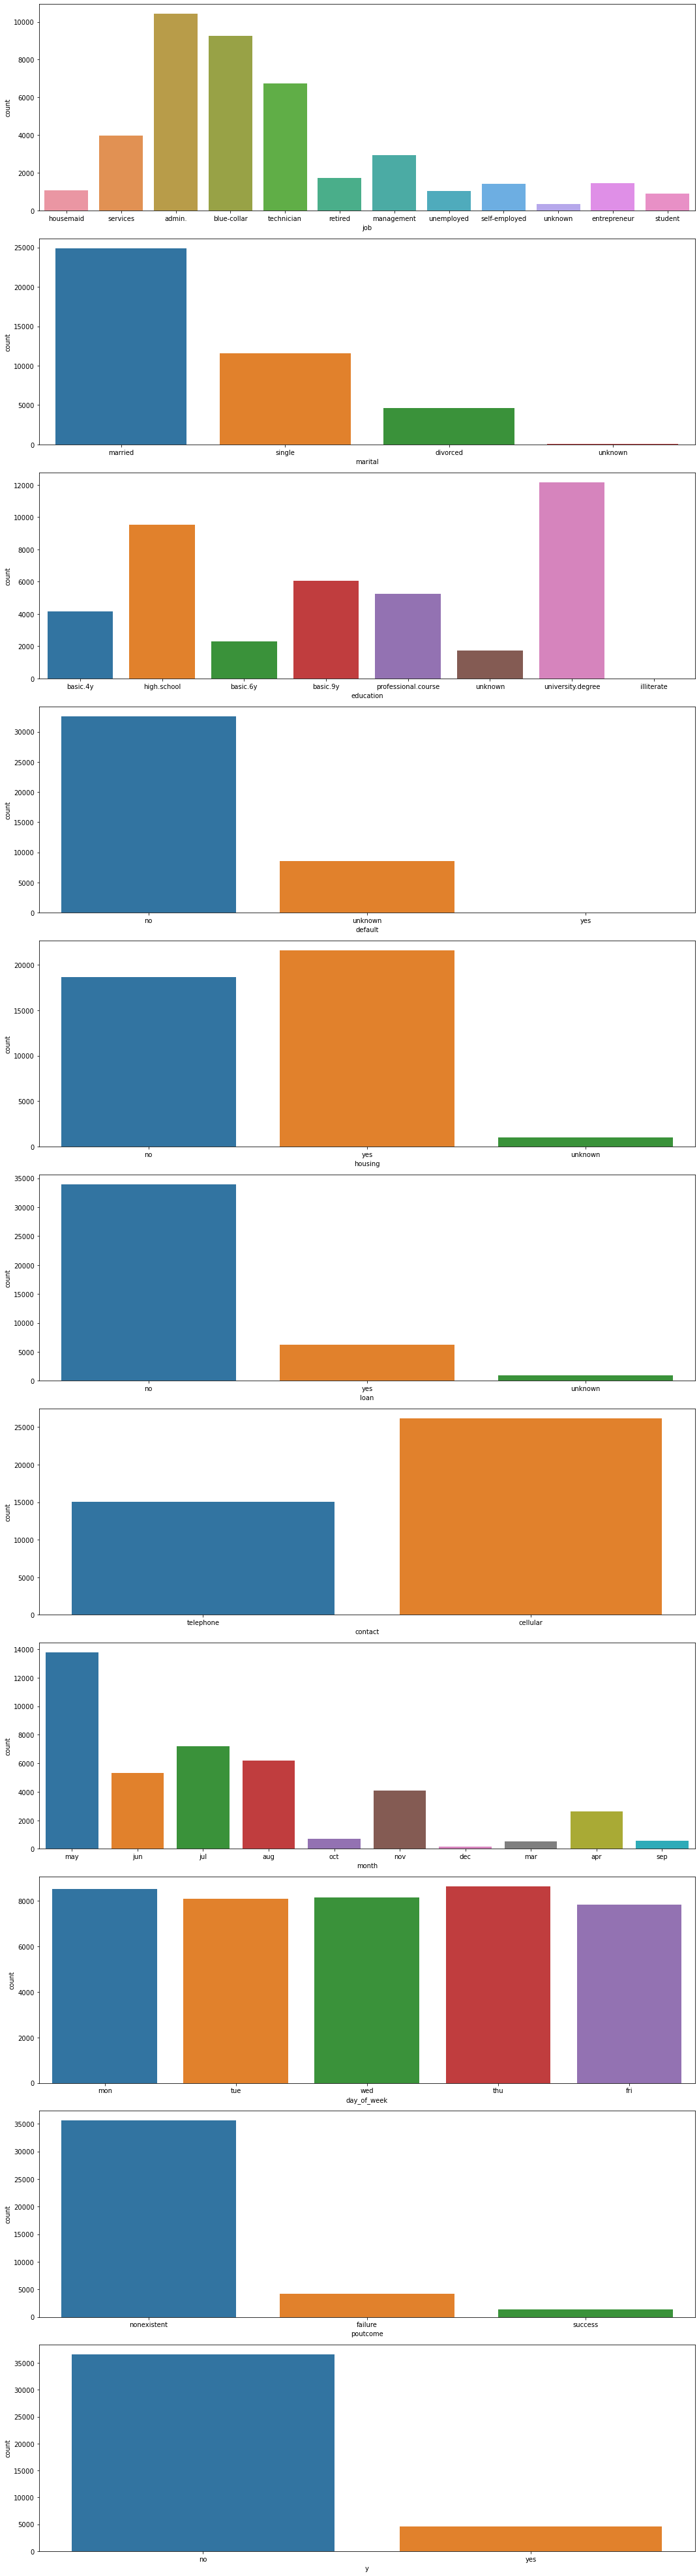

In [10]:
fig, ax = plt.subplots(nrows= 11, ncols = 1, figsize = (15,55))
for i,j in zip(df.select_dtypes(include = "object").columns, ax.flatten()):
    sns.countplot(df[i], ax = j)
plt.tight_layout()

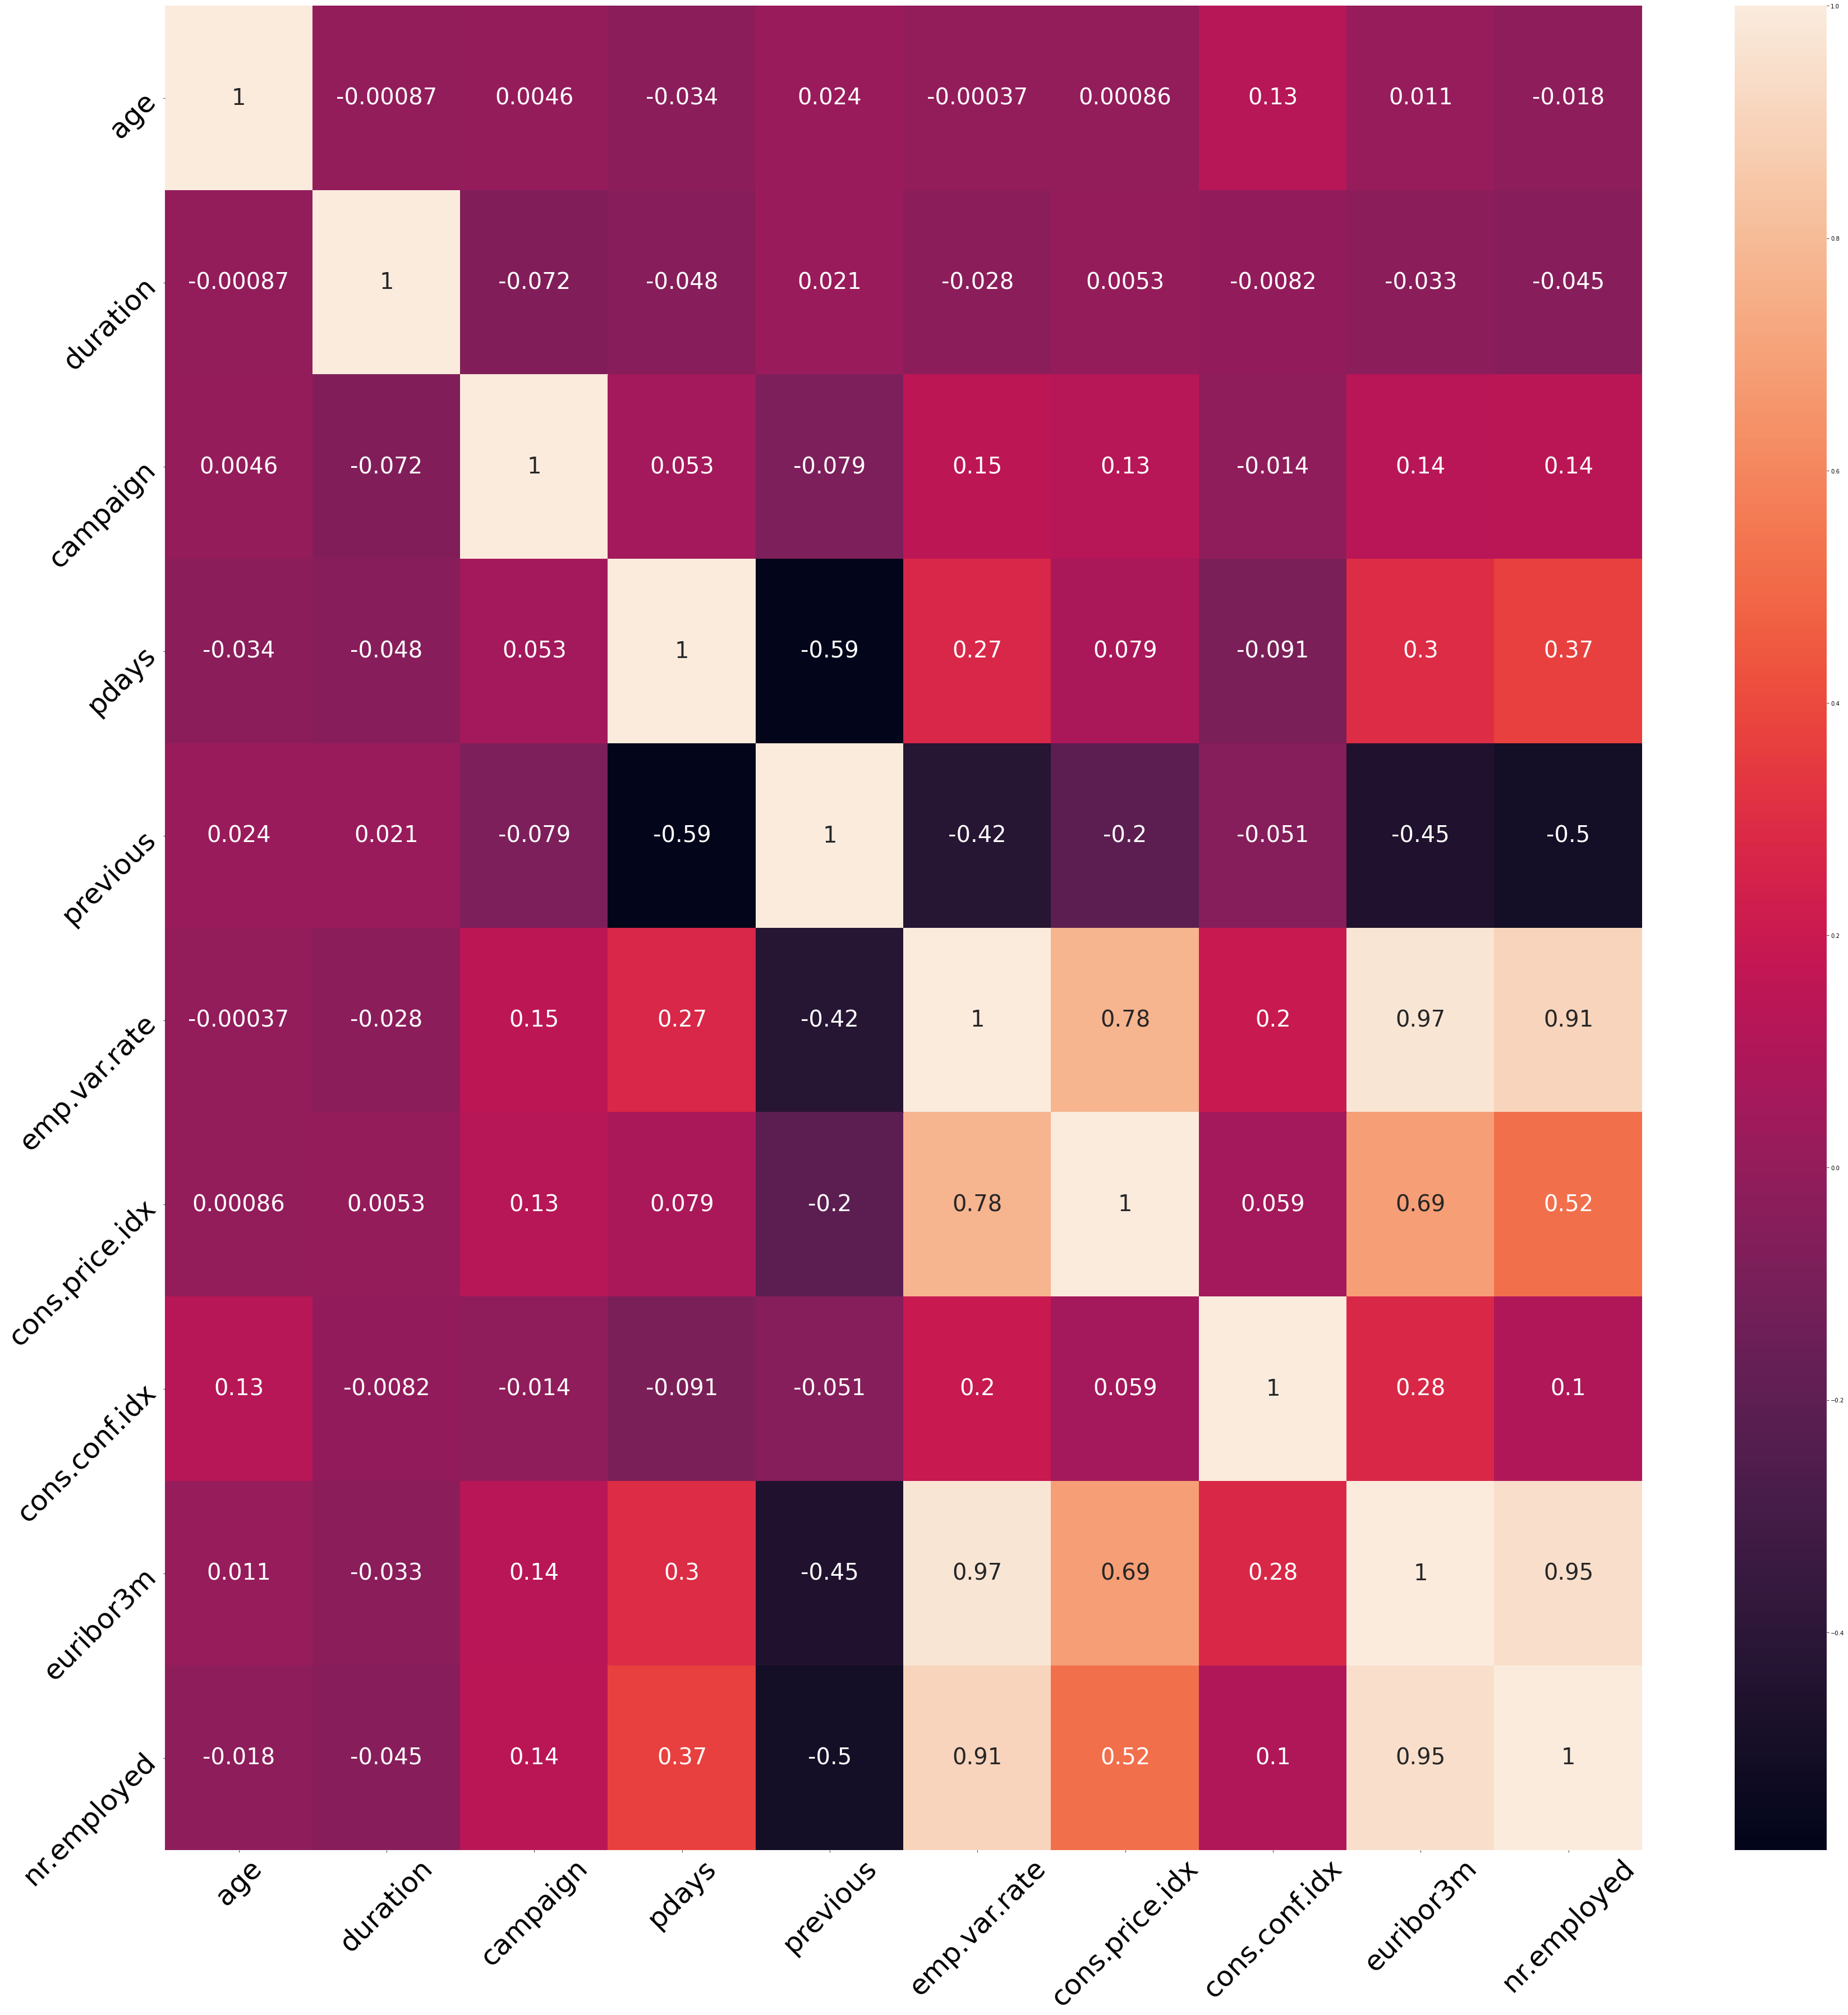

In [11]:
fig, ax = plt.subplots(figsize = (50,50))
sns.heatmap(df.corr(), annot = True, annot_kws = {"size": "40"})
plt.xticks(fontsize = 50, rotation = 45)
plt.yticks(fontsize = 50, rotation = 45)
plt.tight_layout()
plt.show()

In [12]:
df.drop(['euribor3m', 'emp.var.rate', 'nr.employed'], axis=1, inplace=True)

In [13]:
df.y = df.y.replace(["no","yes"],[0,1])

In [14]:
df_dum = pd.get_dummies(df.drop("y", axis = 1))
df_dum

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,93.994,-36.4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,-50.8,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,94.767,-50.8,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,94.767,-50.8,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,94.767,-50.8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [15]:
mms = MinMaxScaler()
final_df = mms.fit_transform(df_dum)
final_df = pd.DataFrame(final_df, columns = df_dum.columns)
final_df = pd.concat([df.y, final_df], axis = 1)

## Building the models

In [16]:
x = final_df.drop("y", axis = 1)
y = final_df.y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [17]:
def model_efficiency(y_pred):
    print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    confusion = pd.DataFrame(cm, index = ["Actual:0","Actual:1"], columns = ["Predicted:0","Predicted:1"])
    sns.heatmap(confusion, annot = True, fmt ="d")
    plt.show()

In [18]:
def plot_roc(y_pred_prob):
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    fig = plt.figure(figsize= (20,15))
    plt.plot(fpr,tpr)
    plt.plot([0,1],"r--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.text(x = 0.02, y = 0.85, s = ("AUC Score: ", roc_auc_score(y_test, y_pred_prob)))
    plt.title('ROC Curve for Term Deposit Subscription', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.grid(True)

In [19]:
mle_model = sm.Logit(y_train, x_train).fit()
mle_model.summary()

         Current function value: 0.222688
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28781
Method:                           MLE   Df Model:                           49
Date:                Wed, 06 Oct 2021   Pseudo R-squ.:                  0.3635
Time:                        02:14:31   Log-Likelihood:                -6420.3
converged:                      False   LL-Null:                       -10087.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.4189      0.230      1.822      0.068      -0.032       0.870
duration                         21.8028      0.414     52.637      0.000      20.991      22.615
campaign                         -4.1693      0.757     -5.511      0.000      -5.652      -2.687
pdays                            -1.1900      0.263     -4.531      0.000      -1.705      -0.675
previous                          2.1376      0.495      4.321      0.000       1.168       3.107
cons.price.idx                   -1.0272      0.143     -7.177      0.000      -1.308      -0.747
cons.conf.idx                     0.9732      0.155      6.290      0.000       0.670       1.276
job_admin.                       -2.0325   2.14e+06   -9.5e-07      1.000   -4.19e+06    4.19e+06
job_blue-collar                  -2.3576   2.15e+06   -1.1e-06      1.000   -4.22e+06    4.22e+06
job_entrepreneur                 -2.2344   2.11e+06  -1.06e-06      1.000   -4.13e+06    4.13e+06
job_housemaid                    -2.0145   2.17e+06  -9.29e-07      1.000   -4.25e+06    4.25e+06
job_management                   -2.2989   2.14e+06  -1.07e-06      1.000    -4.2e+06     4.2e+06
job_retired                      -1.5579   2.13e+06  -7.31e-07      1.000   -4.18e+06    4.18e+06
job_self-employed                -2.3483   2.08e+06  -1.13e-06      1.000   -4.08e+06    4.08e+06
job_services                     -2.3761   2.11e+06  -1.12e-06      1.000   -4.14e+06    4.14e+06
job_student                      -1.4428   2.07e+06  -6.96e-07      1.000   -4.06e+06    4.06e+06
job_technician                   -2.1763   2.01e+06  -1.08e-06      1.000   -3.94e+06    3.94e+06
job_unemployed                   -1.8265    2.1e+06  -8.68e-07      1.000   -4.12e+06    4.12e+06
job_unknown                      -1.9386   2.18e+06  -8.88e-07      1.000   -4.28e+06    4.28e+06
marital_divorced                 -3.1637   1.98e+06   -1.6e-06      1.000   -3.88e+06    3.88e+06
marital_married                  -3.1245   1.48e+06  -2.11e-06      1.000    -2.9e+06     2.9e+06
marital_single                   -2.9594   1.04e+06  -2.86e-06      1.000   -2.03e+06    2.03e+06
marital_unknown                  -3.0890   1.88e+06  -1.64e-06      1.000   -3.68e+06    3.68e+06
education_basic.4y               -3.7747   4.34e+06   -8.7e-07      1.000   -8.51e+06    8.51e+06
education_basic.6y               -3.6955   4.97e+06  -7.44e-07      1.000   -9.74e+06    9.74e+06
education_basic.9y               -3.8880   3.51e+06  -1.11e-06      1.000   -6.89e+06    6.89e+06
education_high.school            -3.8023   4.16e+06  -9.14e-07      1.000   -8.16e+06    8.16e+06
education_illiterate             -2.7071   4.33e+06  -6.25e-07      1.000   -8.49e+06    8.49e+06
education_professional.course    -3.6882   4.75e+06  -7.76e-07      1.000   -9.31e+06    9.31e+06
education_university.degree      -3.5966   4.95e+06  -7.27e-07      1.000    -9.7e+06     9.7e+06
educati

Cohen Kappa Score: 0.4215184953877875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     10935
           1       0.64      0.37      0.47      1422

    accuracy                           0.90     12357
   macro avg       0.78      0.67      0.71     12357
weighted avg       0.89      0.90      0.89     12357



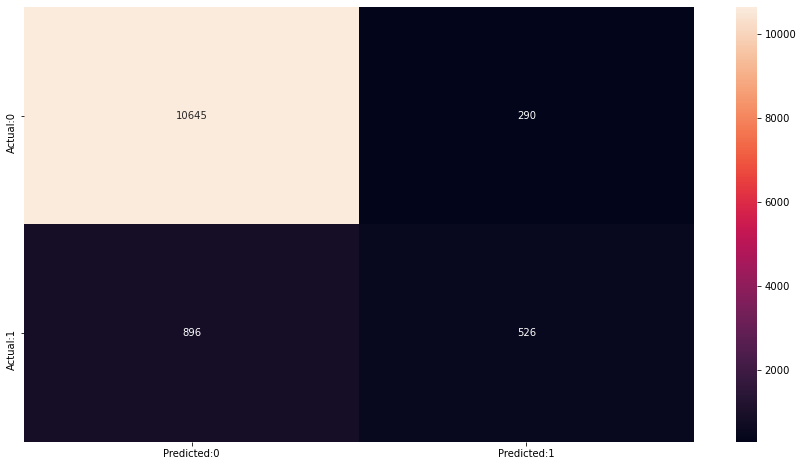

In [20]:
y_pred_mle = mle_model.predict(x_test)
y_pred_mle = [0 if x<0.5 else 1 for x in y_pred_mle]
model_efficiency(y_pred_mle)

Cohen Kappa Score: 0.4039934907922549
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     10935
           1       0.63      0.35      0.45      1422

    accuracy                           0.90     12357
   macro avg       0.78      0.66      0.70     12357
weighted avg       0.89      0.90      0.89     12357



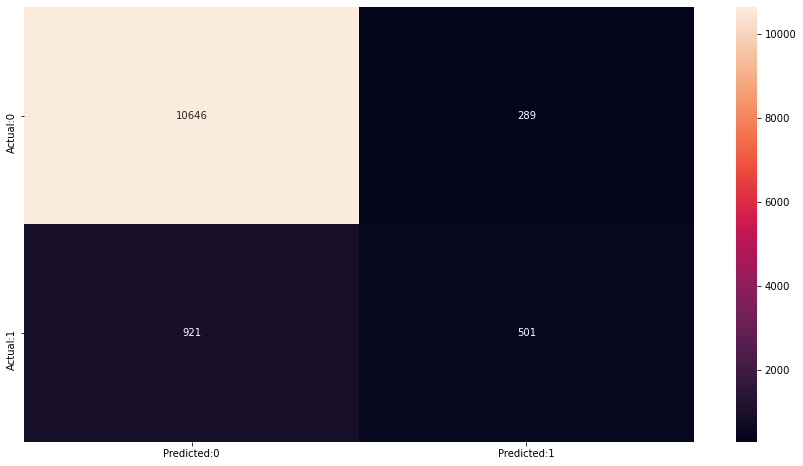

In [21]:
sgd = SGDClassifier()
sgd_model = sgd.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_test)
model_efficiency(y_pred_sgd)

Cohen Kappa Score: 0.4527685119488506
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.65      0.41      0.50      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.72     12357
weighted avg       0.89      0.91      0.90     12357



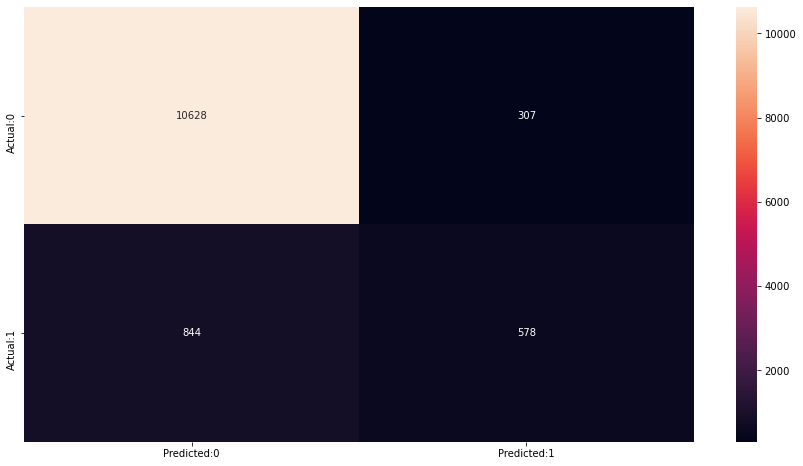

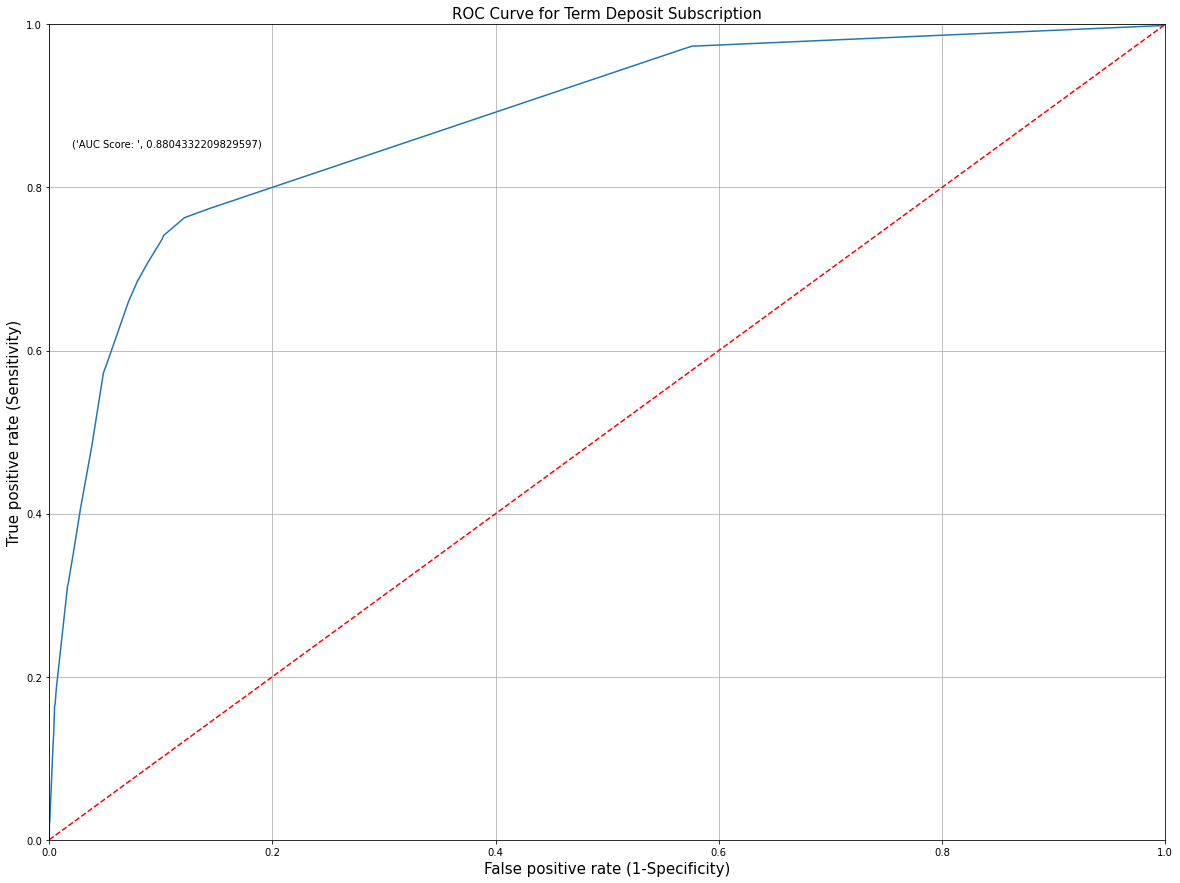

In [22]:
dt= DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 30, criterion = "entropy")
dt_model = dt.fit(x_train, y_train)
y_pred_dt= dt_model.predict(x_test)
y_pred_prob_dt= dt_model.predict_proba(x_test)[:,1]
model_efficiency(y_pred_dt)
plot_roc(y_pred_prob_dt)

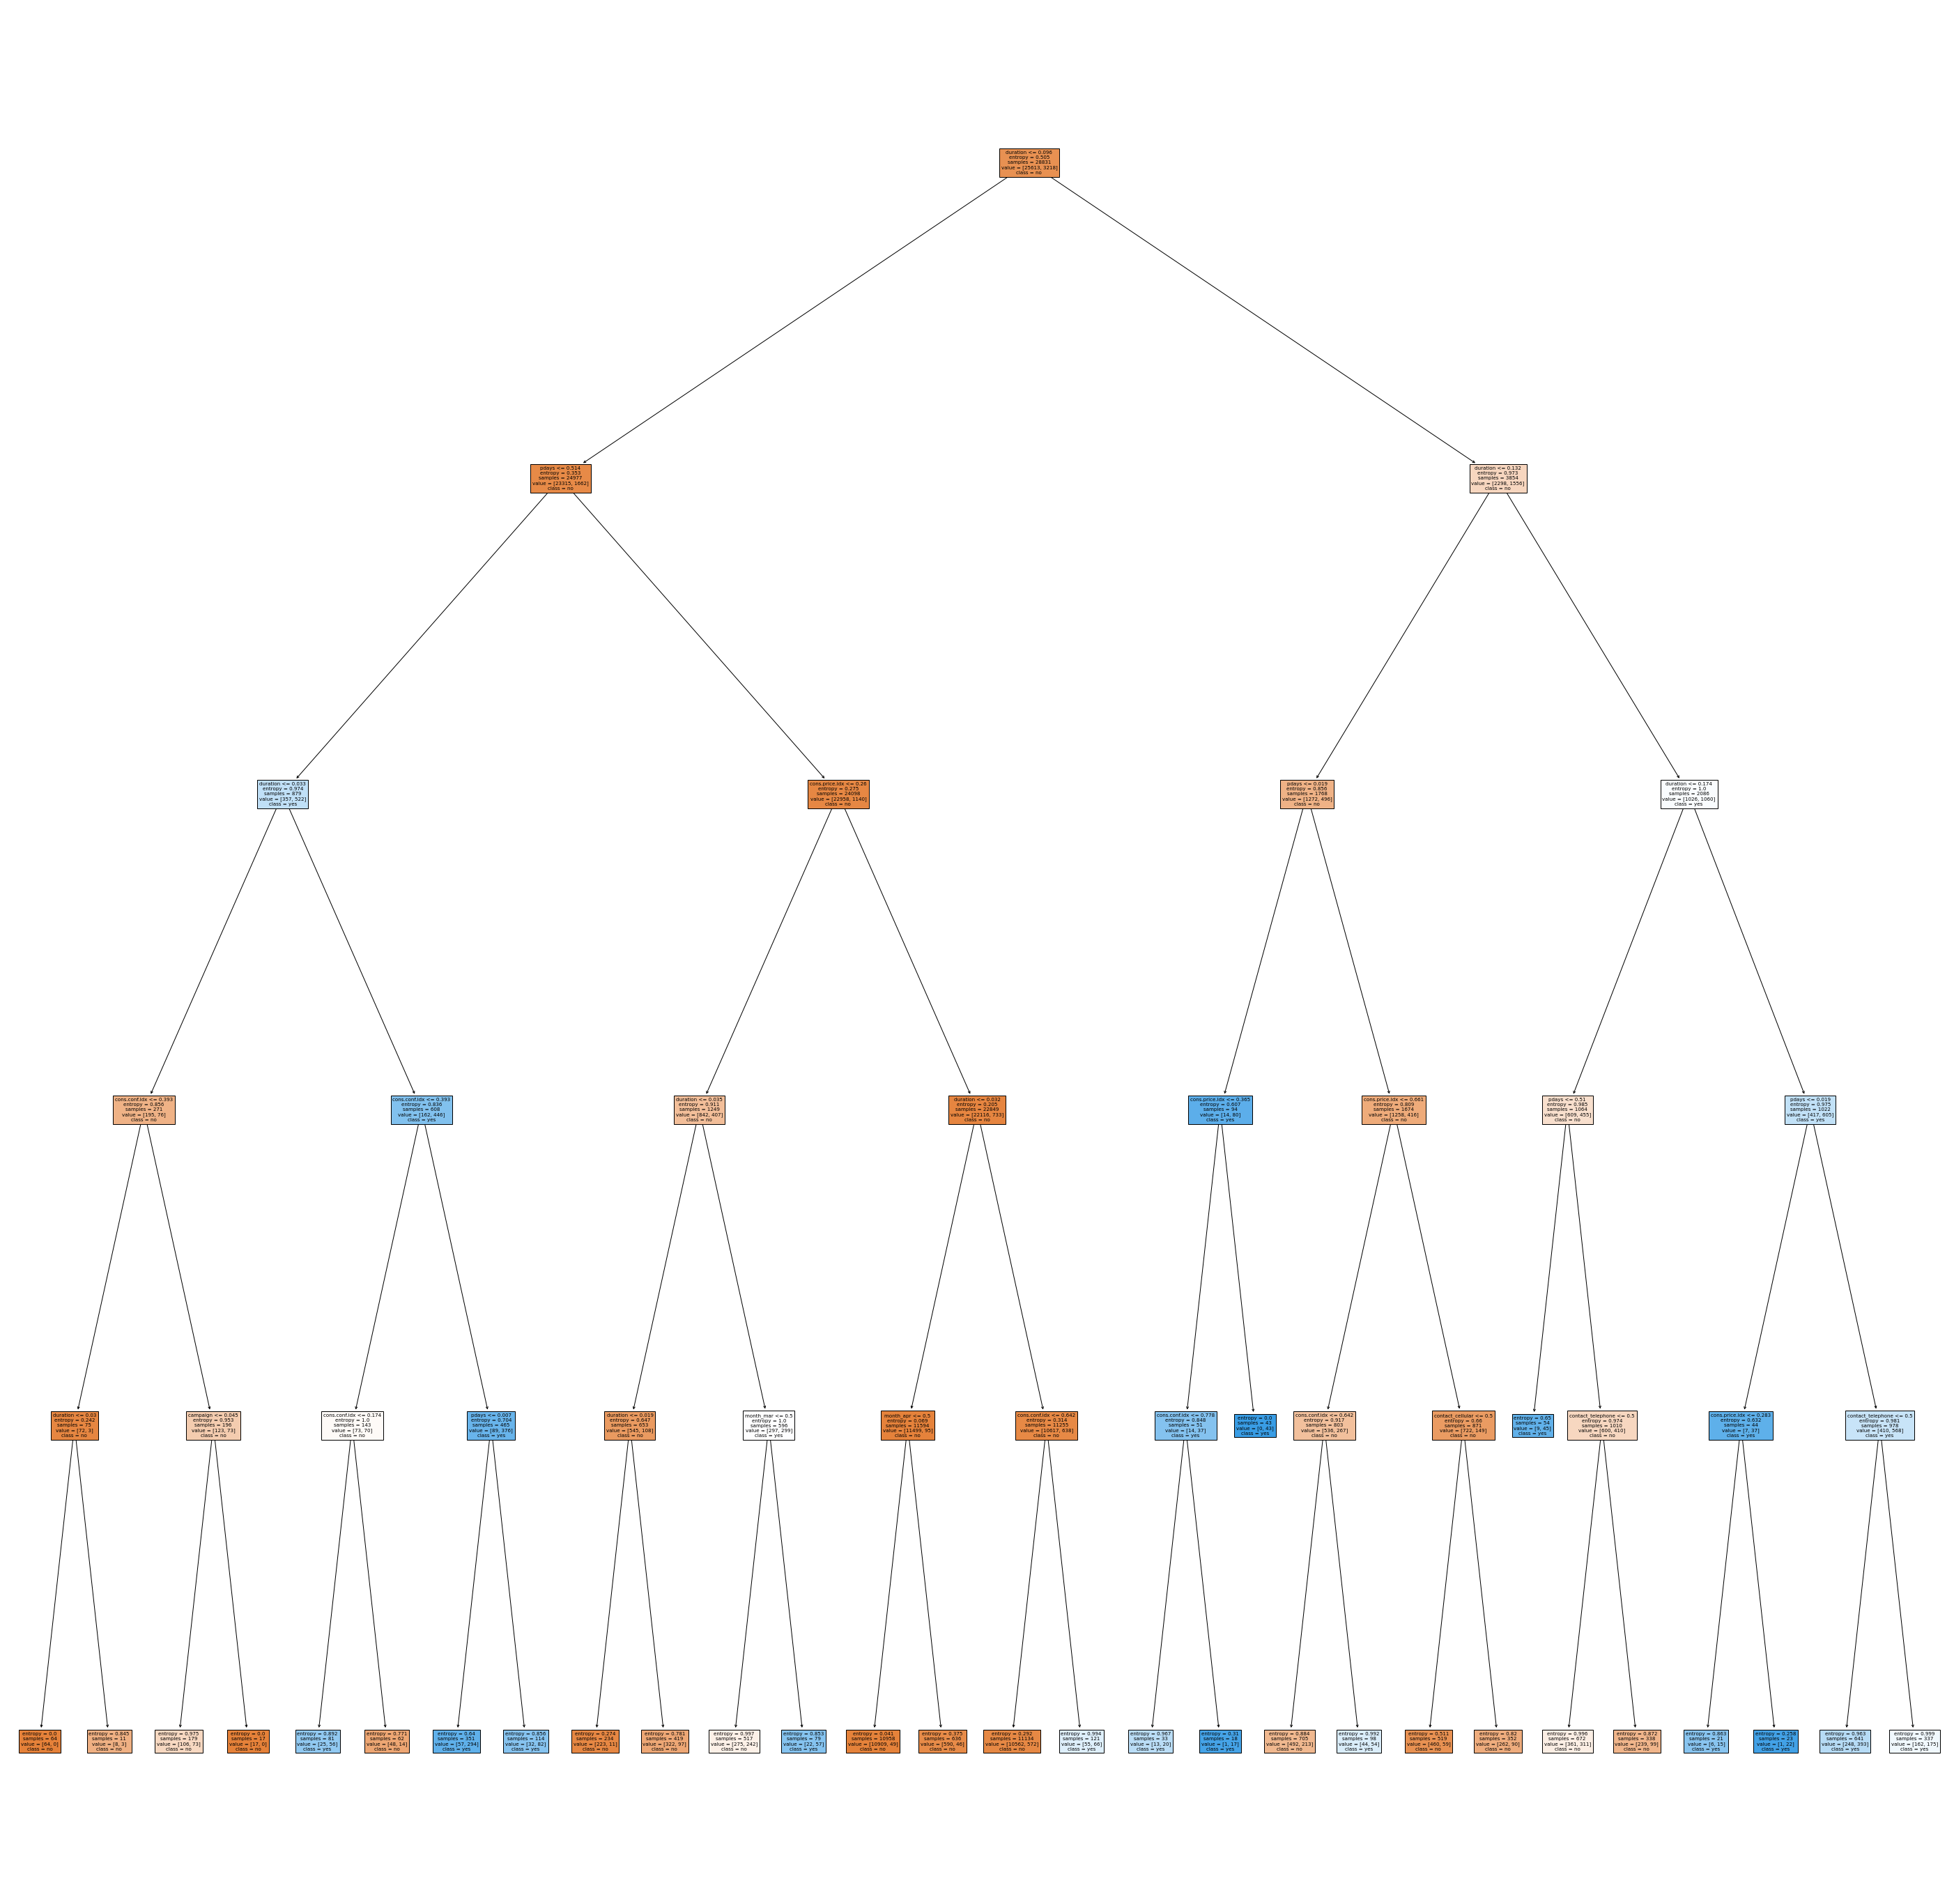

In [23]:
fig = plt.figure(figsize = (50,50))
_ = tree.plot_tree(dt_model, feature_names = x_train.columns, class_names = ["no","yes"], filled = True)

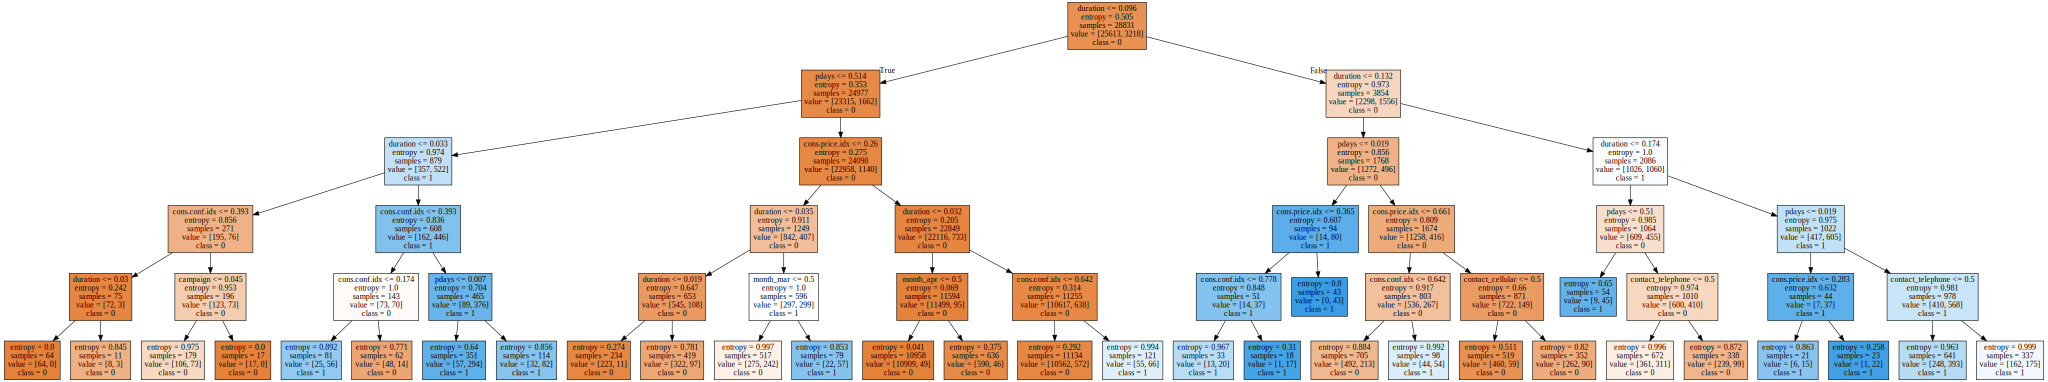

In [24]:
graph = tree.export_graphviz(dt_model, feature_names = x_train.columns, class_names = ["0","1"], filled = True)
graphviz.Source(graph, format= "png")

Cohen Kappa Score: 0.45973595780447496
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.65      0.41      0.51      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



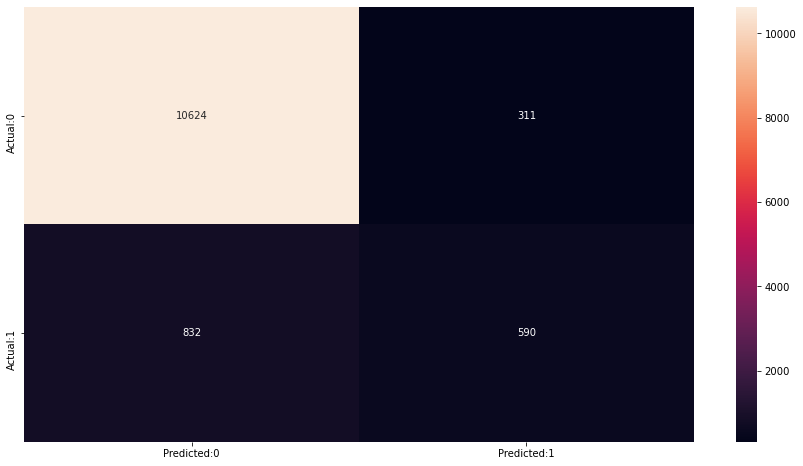

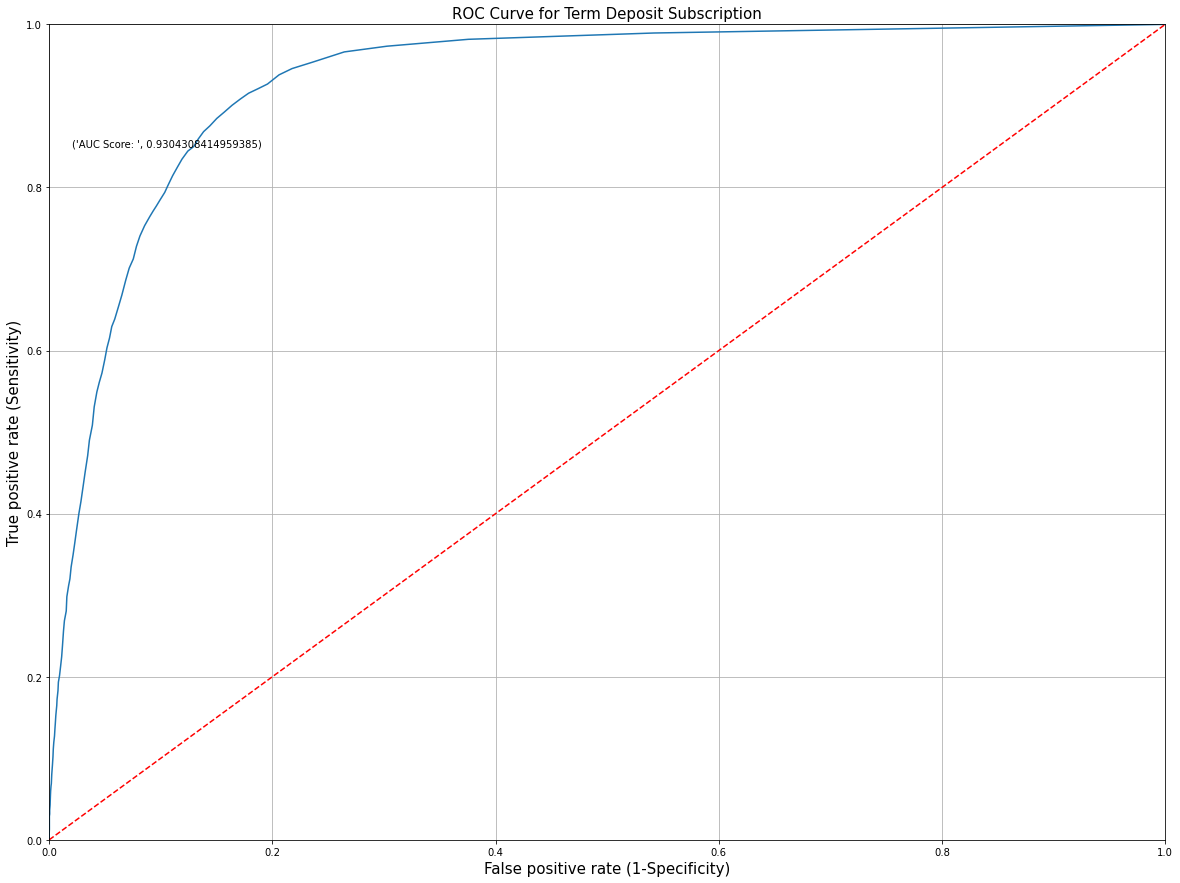

In [25]:
rf= RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
y_pred_rf= rf_model.predict(x_test)
y_pred_prob_rf= rf_model.predict_proba(x_test)[:,1]
model_efficiency(y_pred_rf)
plot_roc(y_pred_prob_rf)

Cohen Kappa Score: 0.4194832118997609
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     10935
           1       0.65      0.36      0.47      1422

    accuracy                           0.90     12357
   macro avg       0.79      0.67      0.71     12357
weighted avg       0.89      0.90      0.89     12357



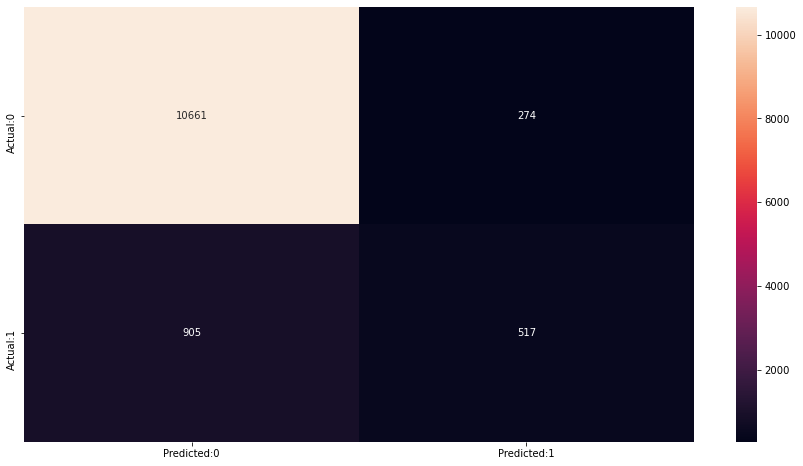

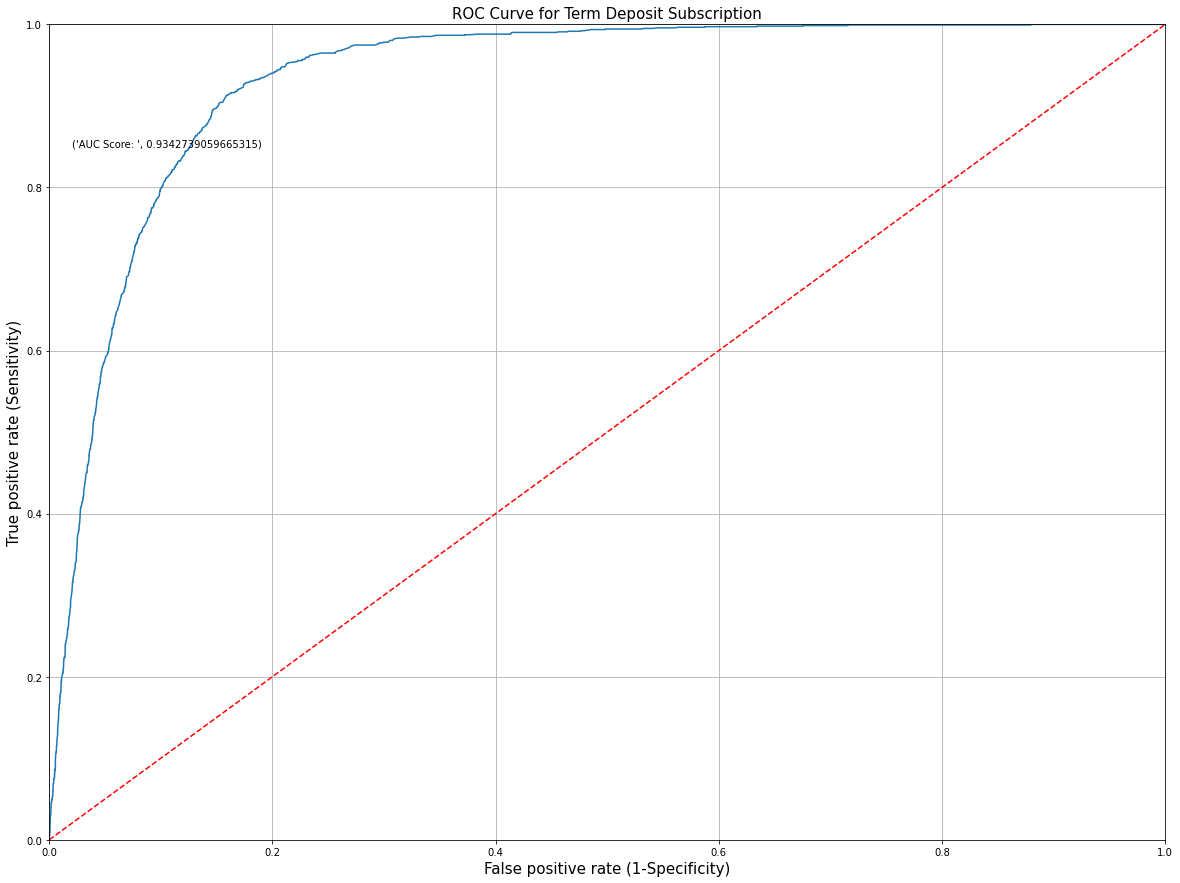

In [26]:
ada= AdaBoostClassifier()
ada_model = ada.fit(x_train, y_train)
y_pred_ada= ada_model.predict(x_test)
y_pred_prob_ada= ada_model.predict_proba(x_test)[:,1]
model_efficiency(y_pred_ada)
plot_roc(y_pred_prob_ada)

[02:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cohen Kappa Score: 0.5260390851632756
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10935
           1       0.65      0.51      0.57      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



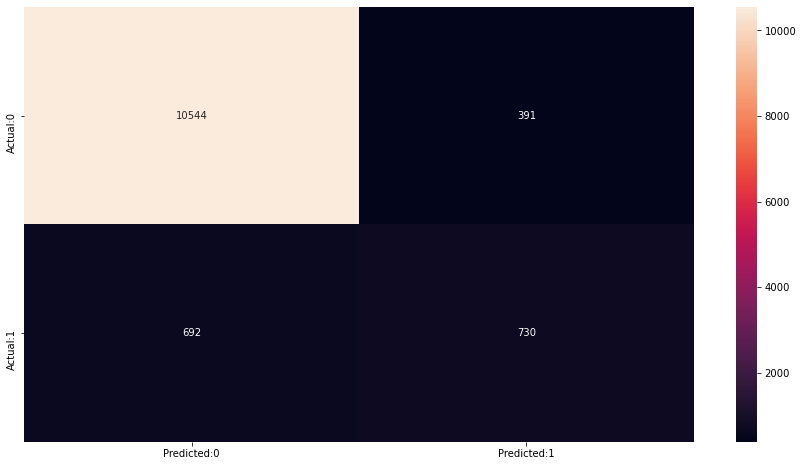

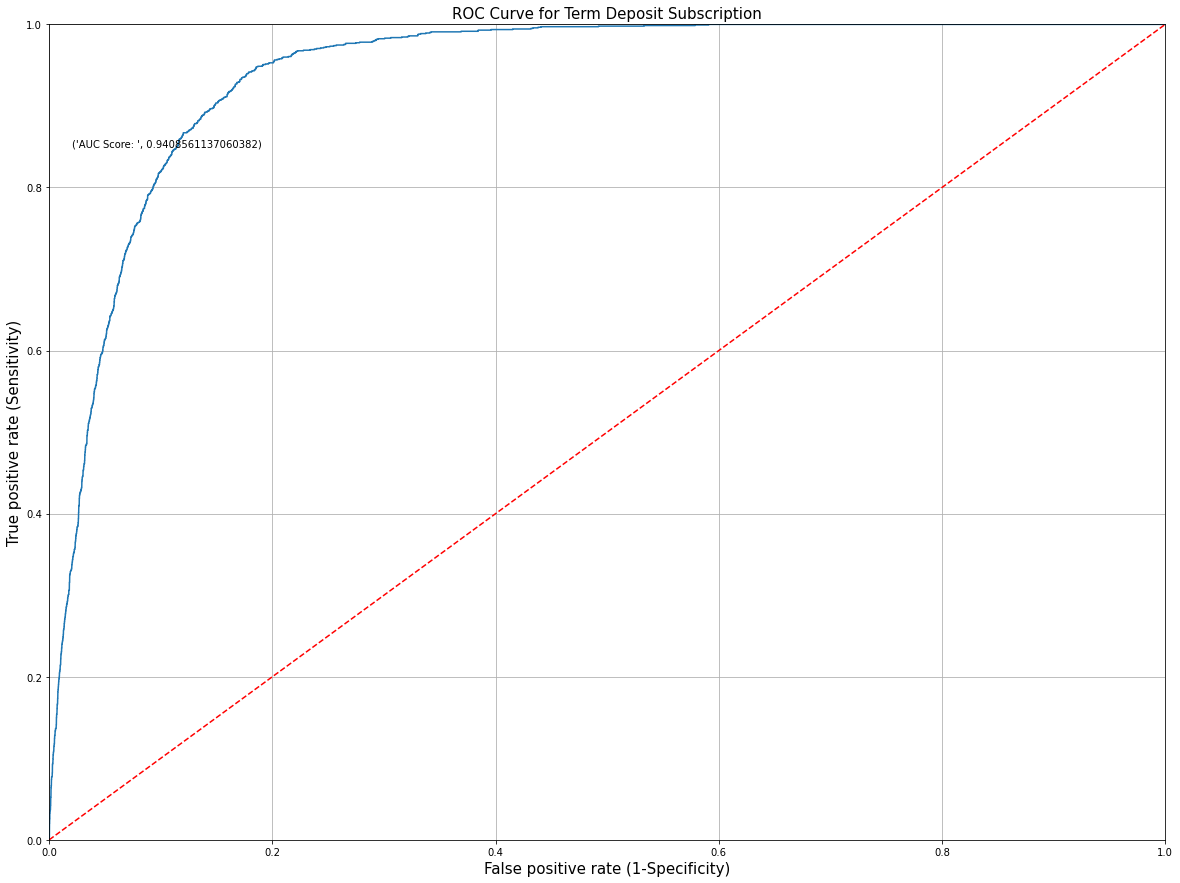

In [27]:
xgb= XGBClassifier()
xgb_model = xgb.fit(x_train, y_train)
y_pred_xgb= xgb_model.predict(x_test)
y_pred_prob_xgb= xgb_model.predict_proba(x_test)[:,1]
model_efficiency(y_pred_xgb)
plot_roc(y_pred_prob_xgb)

Cohen Kappa Score: 0.0060416143373216435
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10935
           1       0.83      0.00      0.01      1422

    accuracy                           0.89     12357
   macro avg       0.86      0.50      0.47     12357
weighted avg       0.88      0.89      0.83     12357



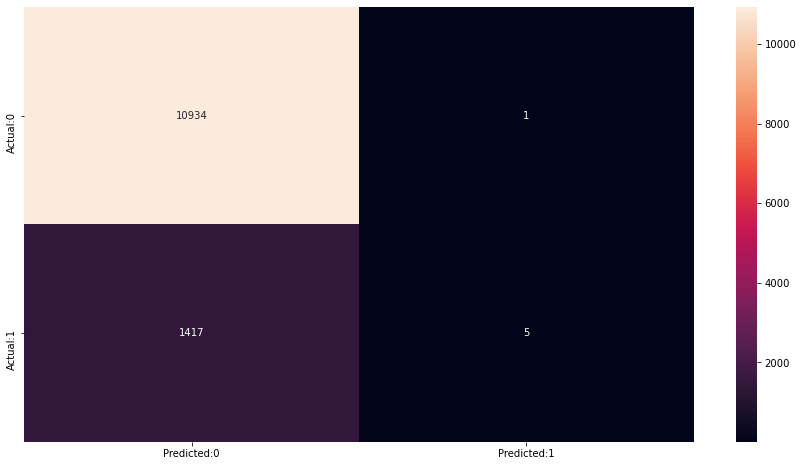

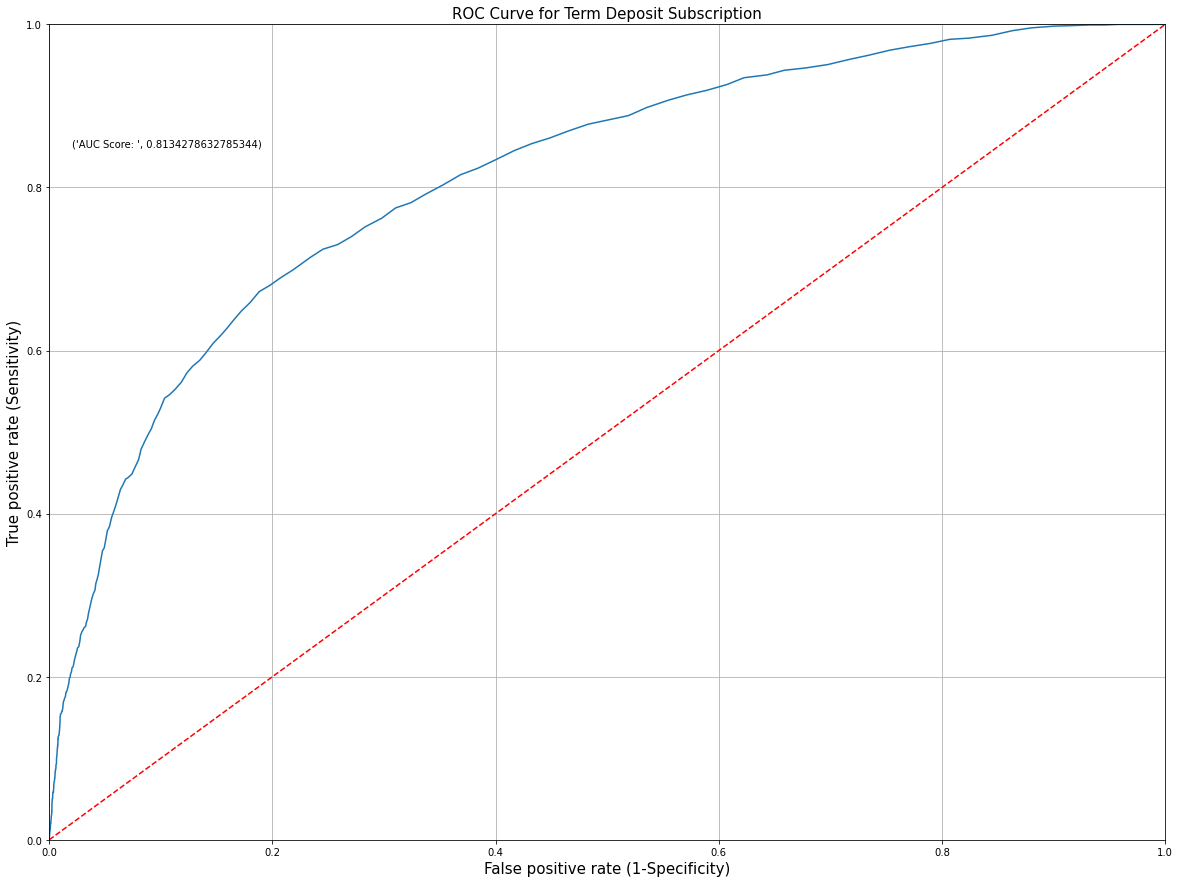

In [28]:
knn= KNeighborsClassifier(n_neighbors = 642)
knn_model = knn.fit(x_train, y_train)
y_pred_knn= knn_model.predict(x_test)
y_pred_prob_knn= knn_model.predict_proba(x_test)[:,1]
model_efficiency(y_pred_knn)
plot_roc(y_pred_prob_knn)

Cohen Kappa Score: 0.2533257909233877
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10935
           1       0.66      0.19      0.29      1422

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



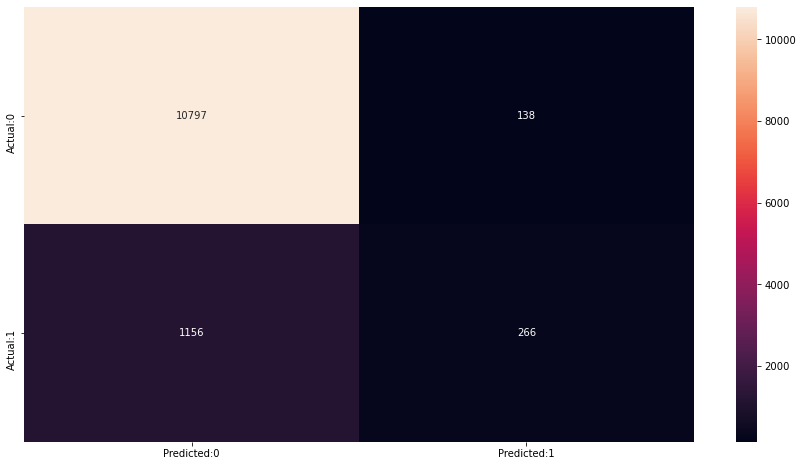

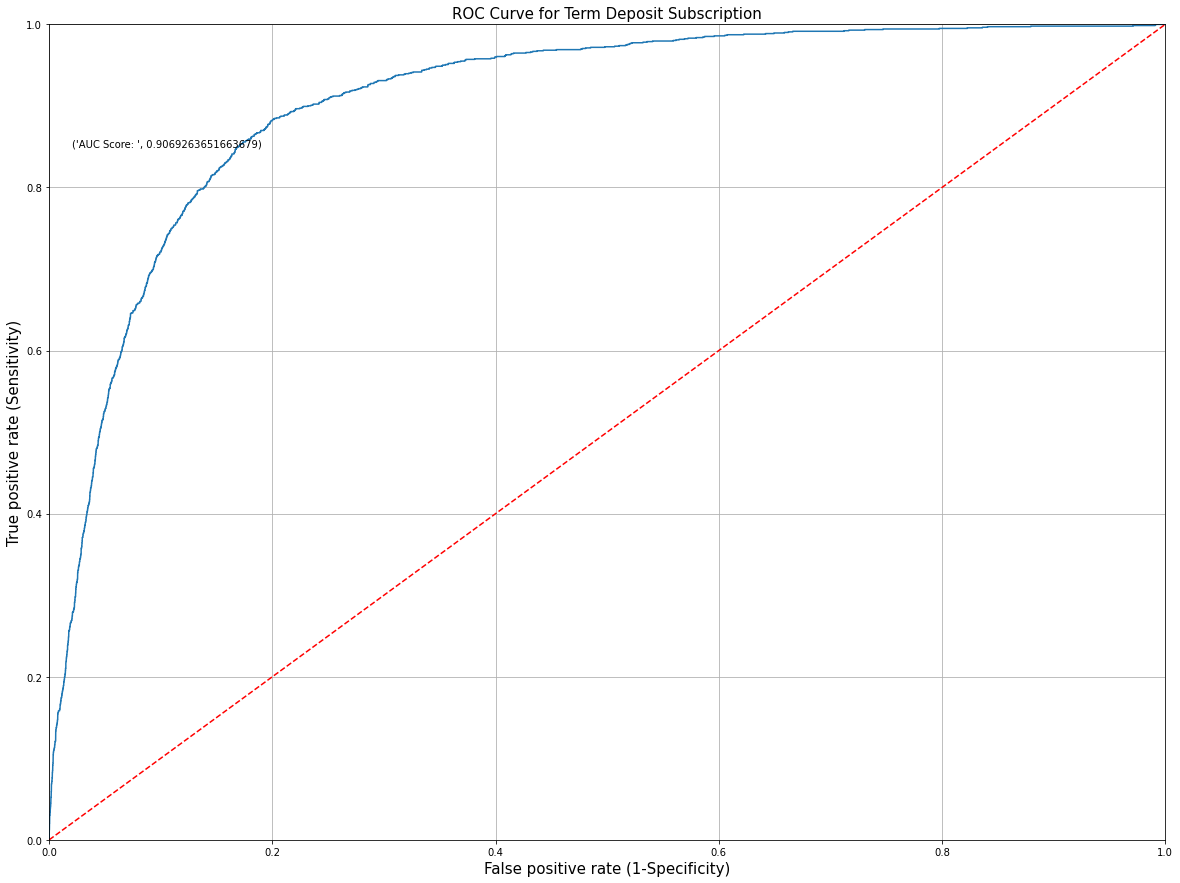

In [29]:
svc= SVC(probability=True)
svc_model = svc.fit(x_train, y_train)
y_pred_svc= svc_model.predict(x_test)
y_pred_prob_svc= svc_model.predict_proba(x_test)[:,1]
model_efficiency(y_pred_svc)
plot_roc(y_pred_prob_svc)

## Model Comparison

In [36]:
results = {"Model Name": ["Logistic Regression", "Stotchastic Gradient Descent","Decision Tree","Random Forest","AdaBoost","XGBoost","KNN","Support Vector Machine"],
          "Accuracy Score":[accuracy_score(y_test,y_pred_mle),accuracy_score(y_test,y_pred_sgd),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_ada),accuracy_score(y_test,y_pred_xgb),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svc)],
          "F1 Score":[f1_score(y_test,y_pred_mle),f1_score(y_test,y_pred_sgd),f1_score(y_test,y_pred_dt),f1_score(y_test,y_pred_rf),f1_score(y_test,y_pred_ada),f1_score(y_test,y_pred_xgb),f1_score(y_test,y_pred_knn),f1_score(y_test,y_pred_svc)],
          "Cohen Kappa Score":[cohen_kappa_score(y_test,y_pred_mle),cohen_kappa_score(y_test,y_pred_sgd),cohen_kappa_score(y_test,y_pred_dt),cohen_kappa_score(y_test,y_pred_rf),cohen_kappa_score(y_test,y_pred_ada),cohen_kappa_score(y_test,y_pred_xgb),cohen_kappa_score(y_test,y_pred_knn),cohen_kappa_score(y_test,y_pred_svc)],
          "ROC AUC Score":[roc_auc_score(y_test,y_pred_mle),roc_auc_score(y_test,y_pred_sgd),roc_auc_score(y_test,y_pred_prob_dt),roc_auc_score(y_test,y_pred_prob_rf),roc_auc_score(y_test,y_pred_prob_ada),roc_auc_score(y_test,y_pred_prob_xgb),roc_auc_score(y_test,y_pred_prob_knn),roc_auc_score(y_test,y_pred_prob_svc)]}
pd.DataFrame(results)

,Model Name,Accuracy Score,F1 Score,Cohen Kappa Score,ROC AUC Score
0,Logistic Regression,0.904022,0.470063,0.421518,0.671691
1,Stotchastic Gradient Descent,0.902080,0.452984,0.403993,0.662946
2,Decision Tree,0.906854,0.501084,0.452769,0.880433
3,Random Forest,0.907502,0.507964,0.459736,0.930431
4,AdaBoost,0.904588,0.467239,0.419483,0.934274
5,XGBoost,0.912357,0.574125,0.526039,0.940856
6,KNN,0.885247,0.007003,0.006042,0.813428
7,Support Vector Machine,0.895282,0.291347,0.253326,0.906926
